[[-7.91693483e-18  1.01404798e-17]
 [ 3.55097029e-04  7.35430028e-05]
 [ 7.89899760e-04  1.36753363e-05]
 [ 7.35359385e-04 -3.89717483e-05]
 [ 7.35430028e-05  1.85135790e-18]
 [ 3.68772366e-04 -1.95831009e-04]
 [ 8.53670039e-04 -2.55698676e-04]
 [ 9.65696494e-04 -5.12040355e-04]
 [ 1.06088819e-03 -8.61278938e-04]
 [ 9.46056524e-04  1.55686261e-05]
 [ 1.00059690e-03 -7.75203552e-05]
 [ 1.12423484e-03 -2.89408287e-04]
 [ 1.23626130e-03 -5.74196218e-04]
 [ 1.33145299e-03 -7.66087244e-04]]
The max deformation is at node 14 and has the value of 0.0015361174235489494
The max Stress is at bar number 1 and has the value of -20559967.766560216


<IPython.core.display.Javascript object>


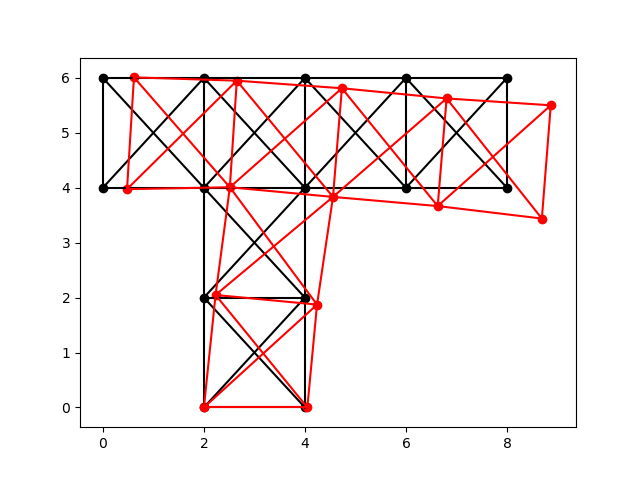

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin,cos,pi,sqrt
data = np.array([   [5,6,90,2],
                    [6,7,90,2],
                    [3,11,90,2],
                    [3,7,0,2],
                    [7,8,0,2],
                    [8,9,0,2],
                    [4,10,90,2],
                    [13,14,0,2],
                    [12,13,0,2],
                    [2,3,90,2],
                    [1,2,90,2],
                    [1,5,0,2],
                    [2,6,0,2],
                    [11,12,0,2],
                    [2,5,-45,2.82842712],
                    [1,6,45,2.82842712],
                    [3,6,-45,2.82842712],
                    [2,7,45,2.82842712],
                    [11,7,-45,2.82842712],
                    [3,12,45,2.82842712],
                    [12,8,-45,2.82842712],
                    [7,13,45,2.82842712],
                    [13,9,-45,2.82842712],
                    [8,14,45,2.82842712],
                    [10,3,-45,2.82842712],
                    [4,11,45,2.82842712],
                    [10,11,0,2],
                    [4,3,0,2],
                    [9,14,90,2],
                    [7,12,90,2],
                    [8,13,90,2]])
Nodes = np.array([[2,0],
                  [2,2],
                  [2,4],
                  [0,4],
                  [4,0],
                  [4,2],
                  [4,4],
                  [6,4],
                  [8,4],
                  [0,6],
                  [2,6],
                  [4,6],
                  [6,6],
                  [8,6]])

def DrawTruss(Xs,Ys,color):
    plt.plot(Xs,Ys,color=color)
def DrawStructure(Nodes,data,color):
    for i in range(31):
        DrawTruss([Nodes[int(data[i,0])-1,0],Nodes[int(data[i,1])-1,0]],[Nodes[int(data[i,0])-1,1],Nodes[int(data[i,1])-1,1]],
                  color)
def GetAngleMatrix(teta):
    teta = (teta*pi)/180
    return np.array([[cos(teta)**2, 0.5*sin(2*teta), -cos(teta)**2, -0.5*sin(2*teta)],
                     [0.5*sin(2*teta), sin(teta)**2, -0.5*sin(2*teta), -sin(teta)**2],
                     [-cos(teta)**2,-0.5*sin(2*teta),cos(teta)**2, 0.5*sin(2*teta)],
                     [-0.5*sin(2*teta), -sin(teta)**2, 0.5*sin(2*teta),sin(teta)**2]])
N = 31
n=14
E = 210*10**9
A = 5*10**(-4)
p = 10000*cos(pi/4)

k = np.zeros([2*n,2*n])
for e in range(N):
    ke = (E*A/data[e,3])*GetAngleMatrix(data[e,2])
    for i in range(2):
        for j in range(2):
            k[int(data[e][i])*2-2:int(data[e][i])*2,int(data[e][j])*2-2:int(data[e][j])*2] += ke[2*i:2*i+2,2*j:2*j+2]

kf = k
f = np.zeros([2*n])
f[6] = f[7] = f[17] = -p
f[16]= f[26] = f[27] = p
for i in range(2*n):
    k[0,i] = 0
    k[1,i] = 0
    k[9,i] = 0 
f[0] = f[1] = f[9] = 0
k[0,0] = k[1,1]  = k[9,9] =1 
u = np.linalg.solve(k,f)
Deltas = np.reshape(u, (-1, 2))
print(Deltas)
NewNodes = Nodes + Deltas
############################################ post process 1 #################################
sigmamax , index= 0,0
for i in range(n):
    x = (sqrt((Deltas[i,0])**2+(Deltas[i,1])**2))
    if x>sigmamax:
        sigmamax, index =  x,i
    else: continue
print('The max deformation is at node '+str(index+1)+' and has the value of '+str(sigmamax))
############################################ post process 2 #################################
maxstress, maxelement = 0,0
for e in range(N):
    oldlenght = data[e,3]
    newX1 = NewNodes[int(data[e,0]-1),0]
    newY1 = NewNodes[int(data[e,0]-1),1]
    newX2 = NewNodes[int(data[e,1]-1),0]
    newY2 = NewNodes[int(data[e,1]-1),1]
    newlength =sqrt((newX2-newX1)**2+(newY2-newY1)**2)
    Strain = (newlength-oldlenght)/oldlenght
    Stress = E*Strain
    if abs(Stress) > abs(maxstress):
        maxstress  = Stress
        maxelement = e
    else: continue
print('The max Stress is at bar number '+str(maxelement+1)+' and has the value of '+str(maxstress))
############################################ post process 3 #################################
VisDeltas = Deltas/sigmamax
NewVisNodes = Nodes + VisDeltas
plt.scatter(Nodes[:,0:1],Nodes[:,1:2],color='black')
plt.scatter(NewVisNodes[:,0:1],NewVisNodes[:,1:2],color='red')
DrawStructure(Nodes,data,'black')
DrawStructure(NewVisNodes,data,'red')
#%matplotlib notebook
plt.show()